### Imports

In [14]:
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import random
from agent import Agent
from config import *

### Set seeds

In [15]:
torch.manual_seed(SEED)  # Sets up seed for both devices
np.random.seed(SEED)
random.seed(SEED)

### Ploting function

In [16]:
def plot(x, scores, epsilons, filename):
    fig = plt.figure()
    ax = fig.add_subplot(111, label="1")
    ax2 = fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Game", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t - 20):(t + 1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")

    plt.savefig(filename)

### Learning process

Episode: 0; Score: -336.09; Avg score: -336.09; Eps: 1.0
Episode: 5; Score: -142.0; Avg score: -142.62; Eps: 0.77
Episode: 10; Score: 8.23; Avg score: -113.67; Eps: 0.4
Episode: 15; Score: -8.13; Avg score: -118.76; Eps: 0.01
Episode: 20; Score: -35.27; Avg score: -85.6; Eps: 0.01
Episode: 25; Score: 40.36; Avg score: -71.18; Eps: 0.01
Episode: 30; Score: -25.31; Avg score: -52.74; Eps: 0.01
Episode: 35; Score: 311.29; Avg score: -43.59; Eps: 0.01
Episode: 40; Score: -84.04; Avg score: -38.98; Eps: 0.01
Episode: 45; Score: 43.92; Avg score: -34.6; Eps: 0.01
Episode: 50; Score: 261.54; Avg score: -12.54; Eps: 0.01
Episode: 55; Score: 250.84; Avg score: 11.28; Eps: 0.01
Episode: 60; Score: 220.01; Avg score: 28.98; Eps: 0.01
Episode: 65; Score: 176.33; Avg score: 44.67; Eps: 0.01
Episode: 70; Score: 262.68; Avg score: 58.53; Eps: 0.01
Episode: 75; Score: -28.38; Avg score: 67.71; Eps: 0.01
Episode: 80; Score: 260.72; Avg score: 73.27; Eps: 0.01
Episode: 85; Score: -32.21; Avg score: 78.1

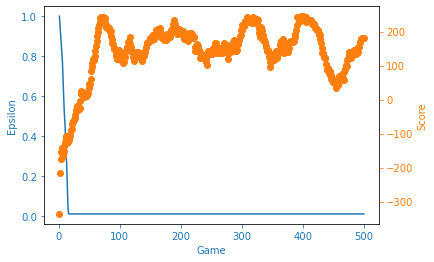

In [18]:
env = gym.make('LunarLander-v2')
env.seed(SEED)
agent = Agent(gamma=GAMMA, eps=EPS, eps_min=EPS_MIN, eps_dec=EPS_DEC, lr=LEARNING_RATE, batch_size=BATCH_SIZE, n_actions=NUM_ENV_ACTIONS,
              input_dims=NUM_ENV_VARIABLES, mem_size=MEMORY_SIZE)
# agent.load_agent()
agent.q_eval.train()
scores, eps_history = [], []

for i in range(N_GAMES):
    score = 0
    done = False  # Terminal state flag
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward, observation_, done)
        agent.learn()
        observation = observation_
    scores.append(score)
    eps_history.append(agent.eps)

    if i % 5 == 0:
        avg_score = np.mean(scores[-100:])
        print(f'Episode: {i}; Score: {round(score, 2)}; Avg score: {round(avg_score, 2)}; Eps: {round(agent.eps, 2)}')

x = [i + 1 for i in range(N_GAMES)]
plot(x, scores, eps_history, 'lunar_lander_score_graph.png')

In [19]:
agent.save_agent('_model2')